In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load data from SQLite database
conn = sqlite3.connect('jobs.db:')
df = pd.read_csv('Job_data.csv')
df.to_sql('AI_jobs', conn, index=False, if_exists='replace')
df = pd.read_sql('SELECT * FROM ai_jobs', conn)


In [3]:
df

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


In [4]:
# Data cleaning
# Convert 'AI Impact' to numeric if necessary and handle missing or infinite values
if df['AI Impact'].dtype == 'object':
    df['AI Impact'] = df['AI Impact'].astype(str).str.extract(r'(\d+\.?\d*)')[0]
    df['AI Impact'] = pd.to_numeric(df['AI Impact'], errors='coerce')

# Convert relevant columns to numeric
for col in ['AI_Workload_Ratio', 'Tasks', 'AI models']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [5]:
# Drop rows with any NaN or infinite values in the selected columns
features = ['AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio']
df = df[features].replace([np.inf, -np.inf], np.nan).dropna()


In [6]:
df

,AI Impact,Tasks,AI models,AI_Workload_Ratio
0,98,365,2546,0.143362
1,95,299,2148,0.139199
2,95,325,2278,0.142669
3,95,193,1366,0.141288
4,92,194,1369,0.141709
...,...,...,...,...
4701,5,686,2798,0.245175
4702,5,556,2206,0.252040
4703,5,1316,4695,0.280298
4704,5,710,2594,0.273709


In [7]:
# Display column names one per line
for column in df.columns:
    print(column)


AI Impact
Tasks
AI models
AI_Workload_Ratio


In [8]:
# Attempt 1: Step 4: Preprocess
# Features and target (excluding Job titles and Domain)
X = df[['AI Impact', 'AI models']]
y = df['AI_Workload_Ratio']

# Convert to numeric before scaling (ensure all data is numerical)
X = X.apply(pd.to_numeric)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [9]:
# Iterative model training and evaluation
results = []
params = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}

best_score = -np.inf
best_model = None
best_pred = None

for n in params['n_estimators']:
    for d in params['max_depth']:
        model = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        results.append({'n_estimators': n, 'max_depth': d, 'r2_score': score})
        if score > best_score:
            best_score = score
            best_model = model
            best_pred = y_pred

In [10]:
# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('model_optimization_results_1.csv', index=False)

In [11]:
# Print final performance
print("Best R^2 Score:", round(best_score, 4))

Best R^2 Score: 0.6208


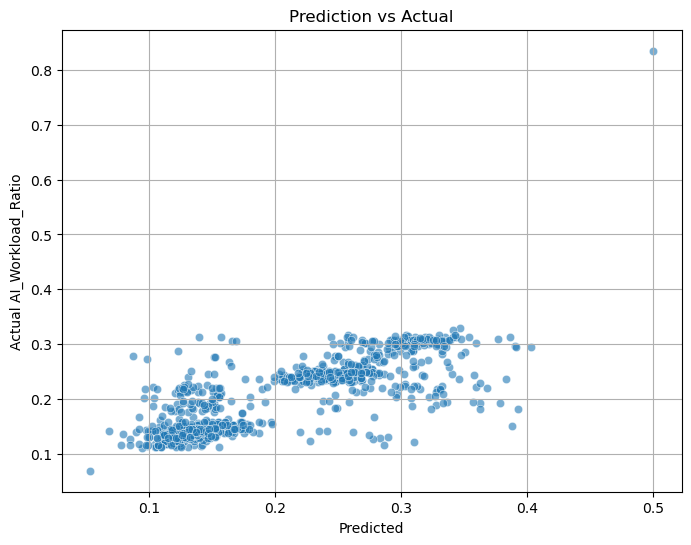

In [12]:
# Plot predictions vs true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.6)
plt.xlabel("Predicted")
plt.ylabel("Actual AI_Workload_Ratio")
plt.title("Prediction vs Actual")
plt.grid(True)

plt.savefig('Prediction vs Actual AI_Workload_Ratio_1.png', dpi=100, bbox_inches='tight')  
    
plt.show()

In [13]:
# Attempt 2: Step 4: Preprocess
# Features and target (excluding Job titles and Domain)
X = df[['AI Impact', 'Tasks']]
y = df['AI_Workload_Ratio']

# Convert to numeric before scaling (ensure all data is numerical)
X = X.apply(pd.to_numeric)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [14]:
# Iterative model training and evaluation
results = []
params = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}

best_score = -np.inf
best_model = None
best_pred = None

for n in params['n_estimators']:
    for d in params['max_depth']:
        model = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        results.append({'n_estimators': n, 'max_depth': d, 'r2_score': score})
        if score > best_score:
            best_score = score
            best_model = model
            best_pred = y_pred

In [15]:
# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('model_optimization_results_2.csv', index=False)

In [16]:
# Print final performance
print("Best R^2 Score:", round(best_score, 4))

Best R^2 Score: 0.8275


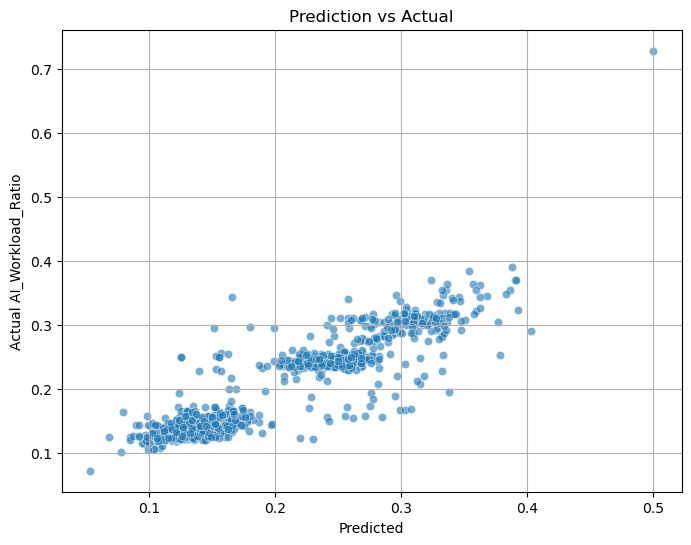

In [17]:
# Plot predictions vs true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.6)
plt.xlabel("Predicted")
plt.ylabel("Actual AI_Workload_Ratio")
plt.title("Prediction vs Actual")
plt.grid(True)

plt.savefig('Prediction vs Actual AI_Workload_Ratio_2.png', dpi=100, bbox_inches='tight')  
    
plt.show()

In [18]:
# Attempt 3: Step 4: Preprocess
# Features and target (excluding Job titles and Domain)
X = df[['AI Impact', 'Tasks', 'AI models']]
y = df['AI_Workload_Ratio']

# Convert to numeric before scaling (ensure all data is numerical)
X = X.apply(pd.to_numeric)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
# Iterative model training and evaluation
results = []
params = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}

best_score = -np.inf
best_model = None
best_pred = None

for n in params['n_estimators']:
    for d in params['max_depth']:
        model = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        results.append({'n_estimators': n, 'max_depth': d, 'r2_score': score})
        if score > best_score:
            best_score = score
            best_model = model
            best_pred = y_pred


In [20]:
# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('model_optimization_results_3.csv', index=False)


In [21]:
# Print final performance
print("Best R^2 Score:", round(best_score, 4))


Best R^2 Score: 0.9802


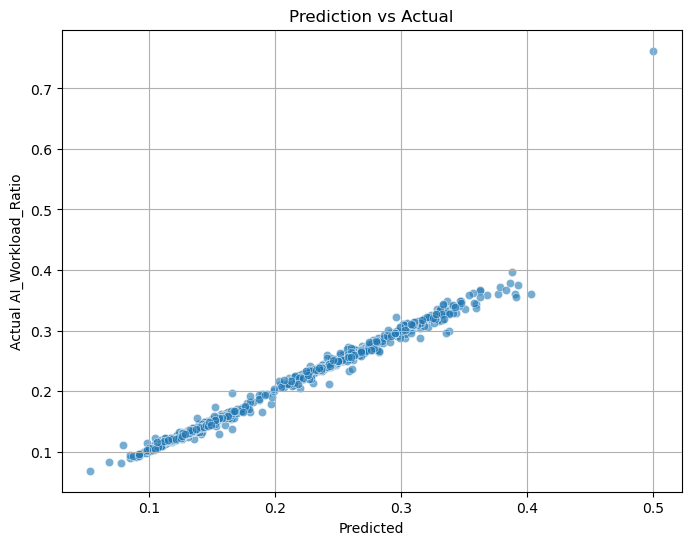

In [22]:
# Plot predictions vs true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.6)
plt.xlabel("Predicted")
plt.ylabel("Actual AI_Workload_Ratio")
plt.title("Prediction vs Actual")
plt.grid(True)

plt.savefig('Prediction vs Actual AI_Workload_Ratio_3.png', dpi=100, bbox_inches='tight')  
    
plt.show()
